# Метод функций Ляпунова

Рассмотрим систему
$$\dot{x} = f(x)$$

и её равновесие $x = 0$.

Пусть существует функция  $V(x,t)$ такая что
$$\left\{ \tag{1}
\begin{array}\\
V(x) > 0, \qquad x >0 \\
V(x) = 0, \qquad x = 0
\end{array}
\right.$$

Рассмотрим её производную по времени в силу уравнений движения ($\dot{x}$ будем заменять на $f(x)$)
$$\dot{V}(x) = \sum_{i} \frac{\partial V}{\partial x}\cdot \dot{x} = \sum_{i} \frac{\partial V}{\partial x}\cdot f(x) = \nabla{V} \cdot f(x)$$

Потребовав 

$$\nabla{V} \cdot f(x) < 0 \tag{2}$$ 

мы обеспечим сходимость траекторий к нулю.

Таким образом, существование функции $V(x)$, удовлетворяющей условиям (1) и (2) гарантирует асимптотическую устойчивость нулевого равновесия системы. Функция $V(x)$ в этом случае называется функцией Ляпунова.

http://www.math24.ru/%D0%BC%D0%B5%D1%82%D0%BE%D0%B4-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9-%D0%BB%D1%8F%D0%BF%D1%83%D0%BD%D0%BE%D0%B2%D0%B0.html

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

# Пример 1

$$\left\{ 
\begin{array}\\
\dot{x}_1 = -3x_1+2x_1x_2^2+u \\
\dot{x}_2=-x_2^3-x_2
\end{array}
\right. \qquad V = \frac{1}{2}(x_1^2 + x_2^2)$$

Производная $V$ в силу уравнений движения:
$$\dot{V} = \frac{\partial V}{\partial x_1}\cdot \dot{x}_1+\frac{\partial V}{\partial x_2}\cdot \dot{x}_2 = x_1\cdot\dot{x}_1 + x_2\cdot\dot{x}_2 = x_1\cdot(-3x_1+2x_1x_2^2+u) + x_2\cdot(-x_2^3-x_2) = -3x_1^2 - x_2^2 - x_2^4 +u\cdot x_1 + 2x_1^2 x_2^2$$

Очевидно, что выбор $u = -2x_1 x_2^2$ гарантирует $\dot{V} < 0$ при $(x_1, x_2) \neq (0,0)$.

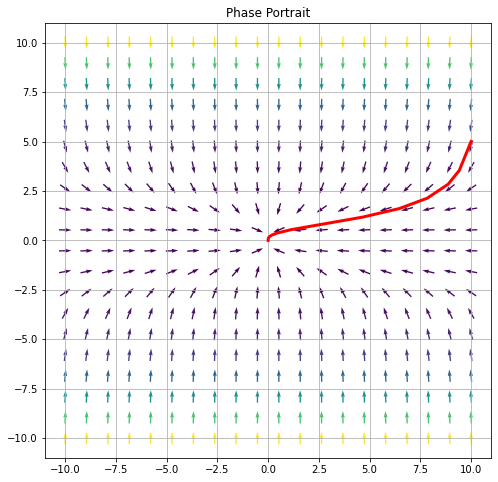

In [31]:
def u1(x):
    return -2 * x[0] * (x[1]**2)

def example1(t, x):
    dxdt = np.empty(2)
    dxdt[0] = -3 * x[0] + 2 * x[0] * x[1]**2 + u1(x)
    dxdt[1] = -x[1]**3 - x[1]
    return dxdt

def rhs1(x):
    return np.array([ -3 * x[0] + 2 * x[0] * x[1]**2 + u1(x), -x[1]**3 - x[1] ])

fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)

# quiverplot
# define a grid and compute direction at each point
x1 = np.linspace(-10, 10, 20)
x2 = np.linspace(-10, 10, 20)

X1, X2  = np.meshgrid(x1, x2)                   
DX1, DX2 = (rhs1([X1, X2]))
M = (np.hypot(DX1, DX2))                        
M[ M == 0] = 1.                                 
DX1 /= M                                        
DX2 /= M

ax1.set_title("Phase Portrait")
ax1.quiver(X1, X2, DX1, DX2, M, pivot='mid')
ax1.grid(True)

sol = solve_ivp(example1, (0, 10), (10, 5))
x = sol.y.T

ax1.plot(x[:, 0], x[:, 1], color='red', linewidth = 3)

# Пример 2a

$$\left\{ 
\begin{array}\\
\dot{x}_1 = x_2^3 \\
\dot{x}_2= u
\end{array}
\right. \qquad V = \frac{1}{2}(x_1^2 + x_2^2)$$

Производная $V$ в силу уравнений движения:
$$\dot{V} = \frac{\partial V}{\partial x_1}\cdot \dot{x}_1+\frac{\partial V}{\partial x_2}\cdot \dot{x}_2 = x_1\cdot\dot{x}_1 + x_2\cdot\dot{x}_2 = x_1\cdot x_2^3 + x_2\cdot u = x_2\cdot(x_1x_2^2 +u).$$

Выбрав $u$ так, что $(x_1x_2^2 +u) = -x_2$ мы можем гарантировать $\dot{V} = -x_2^2$, однако такой выбор управления не удовлетворяет условиям теоремы Ляпунова $\dot{V} < 0$ при $(x_1, x_2) \neq (0,0)$, так как производная $V$ обращается в нуль при $x_2 = 0$ (и любых $x_1$ отличных от нуля).

Таким образом, выбор $u = -x_2 - x_1x_2^2$ не гарантирует сходимости траекторий системы к нулевому равновесию.

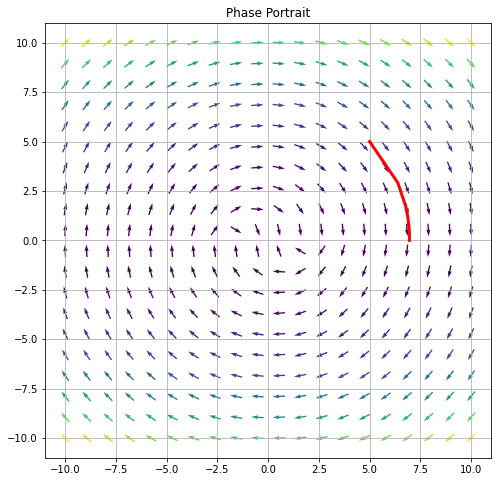

In [32]:
def u_2a(x):
    return -x[1] - x[0] * x[1]**2

def example_2a(t, x):
    dxdt = np.empty(2)
    dxdt[0] = x[1]**3
    dxdt[1] = u_2a(x)
    return dxdt

def rhs_2a(x):
    return np.array([ x[1]**3, u_2a(x) ])

fig_2a = plt.figure(figsize = (8, 8))
ax_2a = fig_2a.add_subplot(1, 1, 1)

# quiverplot
# define a grid and compute direction at each point
x1_2a = np.linspace(-10, 10, 20)
x2_2a = np.linspace(-10, 10, 20)

X1_2a, X2_2a  = np.meshgrid(x1_2a, x2_2a)                   
DX1_2a, DX2_2a = rhs_2a([X1_2a, X2_2a])                      
M_2a = (np.hypot(DX1_2a, DX2_2a))                        
M_2a[ M_2a == 0] = 1.                                 
DX1_2a /= M_2a                                        
DX2_2a /= M_2a

ax_2a.set_title("Phase Portrait")
ax_2a.quiver(X1_2a, X2_2a, DX1_2a, DX2_2a, M_2a, pivot='mid')
ax_2a.grid()

sol_2a = solve_ivp(example_2a, (0, 10), (5, 5))
x_2a = sol_2a.y.T

ax_2a.plot(x_2a[:, 0], x_2a[:, 1], color = 'red', linewidth = 3)

# Пример 2b

$$\left\{ 
\begin{array}\\
\dot{x}_1 = x_2^3 \\
\dot{x}_2= u
\end{array}
\right. \qquad V = \frac{1}{2}x_1^2 + \frac{1}{4}x_2^4$$

Производная $V$ в силу уравнений движения:
$$\dot{V} = \frac{\partial V}{\partial x_1}\cdot \dot{x}_1+\frac{\partial V}{\partial x_2}\cdot \dot{x}_2 = x_1\cdot\dot{x}_1 + x_2^3\cdot\dot{x}_2 = x_1\cdot x_2^3 + x_2^3\cdot u = x_2^3(x_1 + u).$$

Выбор $u = -x_1 - x_2$ как и в предыдущем случае оставляет производную $V$ равной нулю на прямой $x_2 = 0$, однако теперь точки этой прямой не являются равновесиями системы (т.к. в силу выбора управления правая часть дифференциальных уравнений не равна нулю). Таким образом, при выбранном управлении $u = -x_1 - x_2$ траектории не "застревают" на прямой $x_2 = 0$ и сходятся к точке (0, 0).

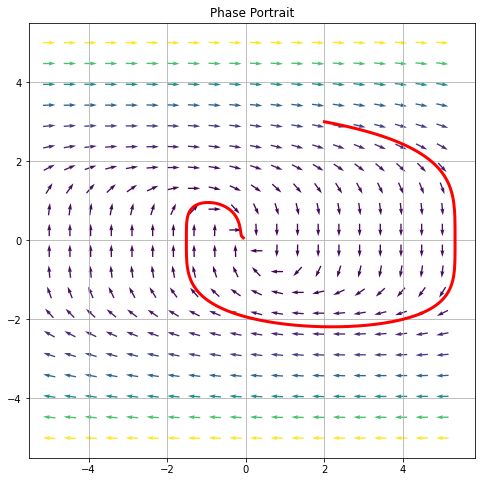

In [33]:
def u_2b(x):
    return (-x[1] -x[0])

def example_2b(t, x):
    dxdt = np.empty(2)
    dxdt[0] = x[1]**3
    dxdt[1] = u_2b(x)
    return dxdt

def rhs_2b(x):
    return np.array([ x[1]**3, u_2b(x) ])

fig1_2b = plt.figure(figsize=(8,8))
ax1_2b = fig1_2b.add_subplot(1,1,1)

# quiverplot
# define a grid and compute direction at each point
x1_2b = np.linspace(-5, 5, 20)
x2_2b = np.linspace(-5, 5, 20)

X1_2b, X2_2b  = np.meshgrid(x1_2b, x2_2b)                   
DX1_2b, DX2_2b = rhs_2b([X1_2b, X2_2b])                  
M_2b = (np.hypot(DX1_2b, DX2_2b))                        
M_2b[ M_2b == 0] = 1.                                 
DX1_2b /= M_2b                                        
DX2_2b /= M_2b

ax1_2b.set_title("Phase Portrait")
ax1_2b.quiver(X1_2b, X2_2b, DX1_2b, DX2_2b, M_2b, pivot='mid')
ax1_2b.grid()

sol_2b = solve_ivp(example_2b, (0, 100), (2, 3), rtol = 1e-10, atol = 1e-10)
x_2b = sol_2b.y.T

ax1_2b.plot(x_2b[:, 0], x_2b[:, 1], color='red', linewidth = 3)

# Пример 2c (задача с ограничением)

Рассмотрим ту же систему уравнений, но добавим ограничение вида
$$h(x) \geq 0$$

Для удовлетворения этого ограничения потребуем, чтобы на траекториях системы выполнялось

$$\dot{h}(x) \geq -\alpha h(x).$$

Если систему можно записать в виде
$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x})+\mathbf{g}(\mathbf{x})\cdot \mathbf{u},$$

задача доопределения управляющего воздействия $u$ (после расчёта требуемого воздействия $u^{req}$) сводится к задаче квадратичного программирования
$$ 
\begin{array}\\
u = arg \min_{u}\frac{1}{2}(u-u^{req})^T \cdot H \cdot (u-u^{req}) \\
L_f h(x) + L_g h(x) + \alpha h(x) \geq 0
\end{array}
$$


Пусть $h(x) = x_2 + 1$, тогда дополнительное ограничение на управляющее воздействие примет вид 
 $$ u \geq -\alpha\cdot(x_2+1).$$

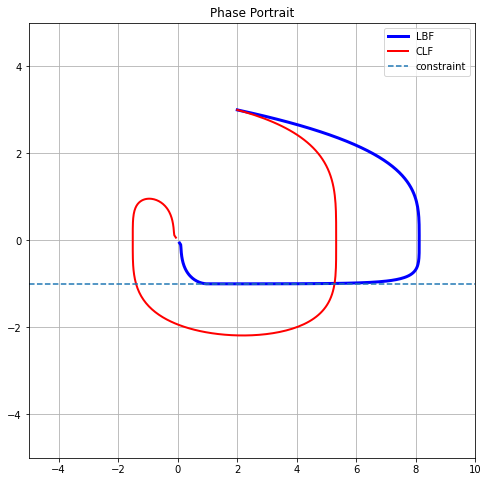

In [34]:
import cvxpy as cp

def u_barrier(x, u_req, alpha=1.0):
  
    u = cp.Variable(1) 

    obj = cp.sum_squares(u - u_req)
    cons = [u >= -alpha * (x[1] + 1)] 
    prob = cp.Problem(cp.Minimize(obj), cons)
    prob.solve()

    return u.value[0]

def u_2b_cbf(x):
    u_req = -x[1] -x[0]
    return u_barrier(x, u_req)

def example_2b_cbf(t, x):
    dxdt = np.empty(2)
    dxdt[0] = x[1]**3
    dxdt[1] = u_2b_cbf(x)
    return dxdt

def rhs_2b_cbf(x):
    return np.array([ x[1]**3, u_2b_cbf(x) ])

fig1_2b_cbf = plt.figure(figsize=(8,8))
ax1_2b_cbf = fig1_2b_cbf.add_subplot(1,1,1)

ax1_2b_cbf.set_title("Phase Portrait")
ax1_2b_cbf.grid()

sol_2b_cbf = solve_ivp(example_2b_cbf, (0, 100), (2, 3), rtol = 1e-10, atol = 1e-10)
x_2b_cbf = sol_2b_cbf.y.T

ax1_2b_cbf.plot(x_2b_cbf[:, 0], x_2b_cbf[:, 1], color='blue', linewidth = 3, label='LBF')
ax1_2b_cbf.plot(x_2b[:, 0], x_2b[:, 1], color='red', linewidth = 2, label='CLF')
ax1_2b_cbf.plot(np.linspace(-5, 10, 100), -1 * np.ones(100), linestyle='dashed', label='constraint')
plt.xlim([-5, 10])
plt.ylim([-5, 5])
ax1_2b_cbf.legend()

# Пример 3 Вращательная динамика твердого тела

$$\left\{ 
\begin{array}\\
\dot{q} = \frac{1}{2} q \circ \omega \\
J\cdot\dot{\omega} = -\omega \times (J \cdot\omega + h) + T_{ctrl}\\
\dot{h} = -T_{ctrl}
\end{array}
\right. $$

См. https://arc.aiaa.org/doi/10.2514/3.20418 B. Wie, H. Weiss, and A. Arapostathis. Quarternion feedback regulator for spacecraft eigenaxis rotations // Journal of Guidance, Control, and Dynamics 1989 12:3, 375-380 


In [35]:
# Вспомогательные функции

def normalize(obj):

    return obj / np.linalg.norm(obj)


def cross_product(a, b):

    def check_dimensions(vec, string):

        if vec.ndim != 1:
            raise Exception("The {} input is not a vector".format(string))
        if len(vec) != 3:
            raise Exception("Wrong number of coordinates in the {0} vector: {1}, should be 3".format(string, len(vec)))

    check_dimensions(a, 'first')
    check_dimensions(b, 'second')

    return np.array([a[1]*b[2]-a[2]*b[1], a[2]*b[0]-a[0]*b[2], a[0]*b[1] - a[1]*b[0]])

def quat_product(q1, q2):

    def check_dimensions(q, string):

        if q.ndim != 1:
            raise Exception("The {} input is not a quaternion".format(string))
        if len(q) != 4:
            raise Exception("Wrong number of coordinates in the {0} quaternion: {1}, should be 4".format(string, len(q)))

    check_dimensions(q1, 'first')
    check_dimensions(q2, 'second')

    q = np.zeros(4)
    q[0] = q1[0] * q2[0] - q1[1:].dot(q2[1:])
    q[1:] = q1[0] * q2[1:] + q2[0] * q1[1:] + cross_product(q1[1:], q2[1:])

    return q

def rotate_vec_with_quat(q, vec):

    def check_dimensions(obj, is_quat):

        if obj.ndim != 1:
            raise Exception("Not a {}".format('quaternion' * is_quat + 'vector' * (1 - is_quat)))
        if len(obj) != (3 + 1 * is_quat):
            raise Exception("Wrong number of coordinates in the {0}: {1}, should be {2}"
                            .format('quaternion' * is_quat + 'vector' * (1 - is_quat), len(obj), 3 + 1 * is_quat))

    check_dimensions(q, True)
    check_dimensions(vec, False)

    q = quat_conjugate(q)

    qxvec = cross_product(q[1:], vec)

    return q[1:].dot(vec) * q[1:] + q[0]**2. * vec + 2. * q[0] * qxvec + cross_product(q[1:], qxvec)

def quat2rpy(q0, q1, q2, q3):

    roll = np.arctan2(2. * (q0 * q1 + q2 * q3), 1. - 2. * (q1**2 + q2**2))
    pitch = np.arcsin(2. * (q0 * q2 - q1 * q3))
    yaw = np.arctan2(2. * (q0 * q3 + q1 * q2), 1. - 2. * (q2**2 + q3**2))

    return [roll, pitch, yaw]

def quat2rpy_deg(q0, q1, q2, q3):
    
    norm_q = np.linalg.norm([q0, q1, q2, q3]) 
    q0, q1, q2, q3 = q0/norm_q, q1/norm_q, q2/norm_q, q3/norm_q 
    

    roll = np.arctan2(2. * (q0 * q1 + q2 * q3), 1. - 2. * (q1**2 + q2**2))*180/np.pi
    pitch = np.arcsin(2. * (q0 * q2 - q1 * q3))*180/np.pi
    yaw = np.arctan2(2. * (q0 * q3 + q1 * q2), 1. - 2. * (q2**2 + q3**2))*180/np.pi

    return [roll, pitch, yaw]

def quat_conjugate(q):

    q_new = np.copy(q)
    q_new[1:] *= -1.

    return q_new

In [36]:
def ctrl_torque(quat, omega, h, ctrl, J):
       
    dw = omega - ctrl.omega_req
    dq = quat_product(quat_conjugate(ctrl.q_req), quat)
    trq_ctrl = np.zeros(3)
    
    trq_ctrl = cross_product(omega, J.dot(omega)  + h) - ctrl.kw * J.dot(dw) - ctrl.kq * J.dot(dq[1:])
            
    if np.max(np.abs(trq_ctrl)) > ctrl.trq_max:
        trq_ctrl *= ctrl.trq_max / np.max(np.abs(trq_ctrl))  
        
    for i in range(3):
        if np.abs(h[i]) / ctrl.h_max > 0.99 and trq_ctrl[i] * h[i] < 0:
            trq_ctrl[i] = 0        
        
    return trq_ctrl

def rhs(t, x, sat, ctrl):

    quat = x[:4] / np.linalg.norm(x[:4])
    omega = x[4:7]
    h = x[7:]
     
    control_action = ctrl_torque(quat, omega, h, ctrl, sat.J)        

    x_dot = np.zeros(10)

    x_dot[0] = -0.5 * quat[1:].dot(omega)
    x_dot[1:4] = 0.5 * (quat[0] * omega + cross_product(quat[1:], omega))
    x_dot[4:7] = sat.J_inv.dot(control_action - cross_product(omega, sat.J.dot(omega) + h))
    x_dot[7:]= -control_action
        
    return x_dot

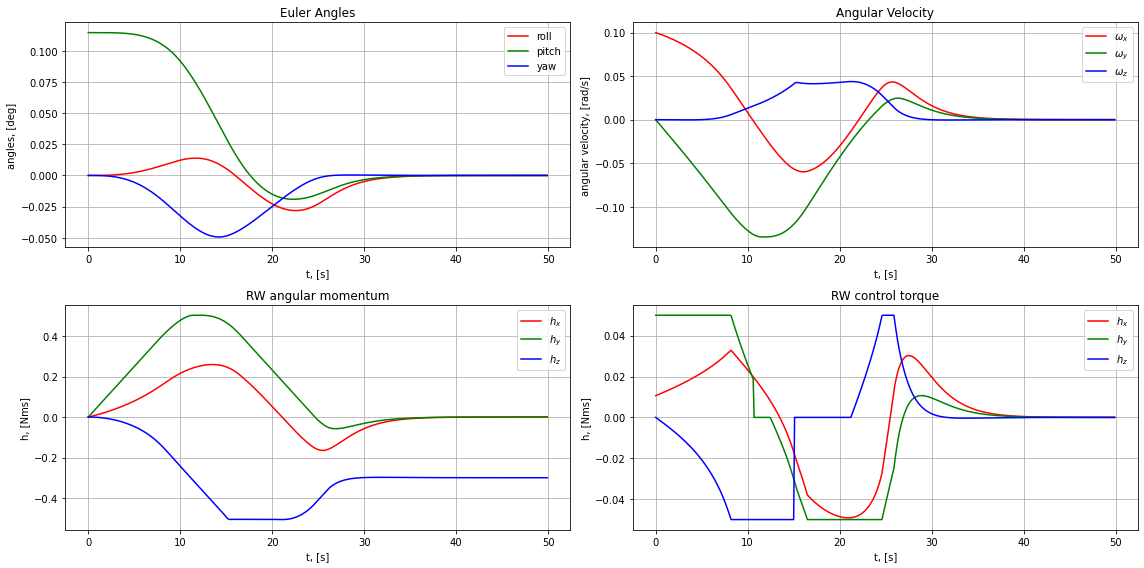

In [37]:
class Parameters(object):
    pass

sat = Parameters()
sat.J = np.diag(np.array([3, 4, 5]))
sat.J_inv = np.linalg.inv(sat.J)

a = 0.5
ctrl = Parameters()
ctrl.kw = 2 * a
ctrl.kq = 2 * a**2
ctrl.trq_max = 0.05
ctrl.h_max = 0.5
ctrl.omega_req = np.zeros(3)
ctrl.q_req = np.array([1., 0., 0., 0.])

x_0 = np.array([np.cos(np.pi/4), 0, np.sin(np.pi/4), 0, 0.1, 0, 0, 0, 0, 0])

t0 = 0.
tf = 50.
t_eval = np.arange(t0, tf, 0.1)

sol = solve_ivp(lambda t, x: rhs(t, x, sat, ctrl), (t0,tf), x_0, t_eval = t_eval)
x = sol.y.T
t = sol.t
roll, pitch, yaw = quat2rpy_deg(x[1:,0], x[1:,1], x[1:,2], x[1:,3])

control = np.zeros((np.size(t), 3))
for i in range(np.size(t)):
    control[i] = ctrl_torque(x[i, 0:4], x[i, 4:7], x[i, 7:], ctrl, sat.J)


roll, pitch, yaw = quat2rpy_deg(x[:,0], x[:,1], x[:,2], x[:,3])
   
fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.add_subplot(2,2,1)

ax1.set_title("Euler Angles")
ax1.plot(t, roll, label = 'roll', color = 'red')
ax1.plot(t, pitch, label = 'pitch', color = 'green')
ax1.plot(t, yaw, label = 'yaw', color = 'blue')
ax1.set_ylabel(r'angles, [deg]')
ax1.set_xlabel(r't, [s]')
ax1.grid(True)
ax1.legend()

ax2 = fig1.add_subplot(2,2,2)

ax2.set_title("Angular Velocity")
ax2.plot(t, x[:,4], label = '$\omega_x$', color = 'red')
ax2.plot(t, x[:,5], label = '$\omega_y$', color = 'green')
ax2.plot(t, x[:,6], label = '$\omega_z$', color = 'blue')
ax2.set_ylabel(r'angular velocity, [rad/s]')
ax2.set_xlabel(r't, [s]')
ax2.grid(True)
ax2.legend()

ax3 = fig1.add_subplot(2,2,3)

ax3.set_title("RW angular momentum")
ax3.plot(t, x[:,7], label = '$h_x$', color = 'red')
ax3.plot(t, x[:,8], label = '$h_y$', color = 'green')
ax3.plot(t, x[:,9], label = '$h_z$', color = 'blue')
ax3.set_ylabel(r'h, [Nms]')
ax3.set_xlabel(r't, [s]')
ax3.grid(True)
ax3.legend()

ax4 = fig1.add_subplot(2,2,4)

ax4.set_title("RW control torque")
ax4.plot(t, -control[:,0], label = '$h_x$', color = 'red')
ax4.plot(t, -control[:,1], label = '$h_y$', color = 'green')
ax4.plot(t, -control[:,2], label = '$h_z$', color = 'blue')
ax4.set_ylabel(r'h, [Nms]')
ax4.set_xlabel(r't, [s]')
ax4.grid(True)
ax4.legend()

plt.tight_layout()

# Возможные задачи:

1. Colin R. Mclnnes -- Large angle slew maneuvers with autonomous sun vector avoidance
https://arc.aiaa.org/doi/10.2514/3.21283

2. Ahmed Mahfouz -- Hybrid Attitude Control for Nano-Spacecraft: Reaction Wheel Failure and Singularity Handling
https://arc.aiaa.org/doi/10.2514/1.G005525

3. Oscar Danilo Montoya -- Nonlinear analysis and control of a reaction wheel pendulum: Lyapunov-based approach
https://repositorio.utb.edu.co/bitstream/handle/20.500.12585/8722/DOI10_1016j_jestch_2019_03_004.pdf?sequence=1&isAllowed=y

4. Zachary Manchester -- Lyapunov-Based Control for Flat-Spin Recovery and Spin Inversion of Spin-Stabilized Spacecraft
https://arc.aiaa.org/doi/abs/10.2514/6.2016-5644

5. Выбор коэффициентов регулятора из примера о вращательной динамике твердого тела